# Example usage of the MaxCut, QAOA, and SwarmOptimizer classes
First of all, the classes need to be imported. The MaxCut file also provides functions which initialize the MaxCut class for a given graph

In [1]:
from MaxCut import MaxCut, HalvedSquareGraph, SquareGraph, CircleGraph, FullGraph, RandomConnectedGraph
from SwarmOptimizer import SwarmOptimizer
from QAOA import QAOA

We'll also import numpy and matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## MaxCut class
Now the MaxCut class can be initialized. The initialization of the class directly is 
```python
MaxCut(NodeCnt, Edges)
```
Here `NodeCnt` is the number of nodes and `Edges` is an array of the edges between the nodes in the form (Node a, Node b, weight). Practical examples can be found in e.g. the code for `HalvedSquareGraph()`

In [4]:
# Initialize with the predefined graph
maxcut = HalvedSquareGraph()
# Alternative option of a randomly connected graph of 8 nodes. Uncomment to use
# maxcut = RandomConnectedGraph(8)

Lets print the chosen graph:

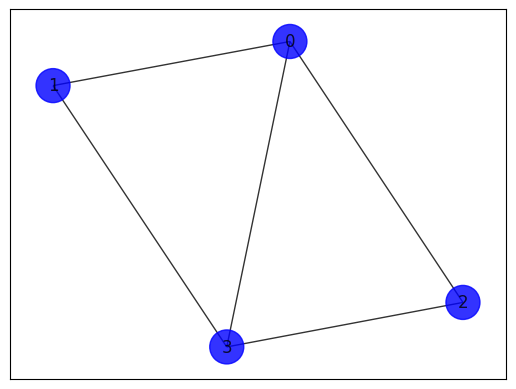

In [9]:
maxcut.PrintGraph()
plt.show()

## QAOA class
For the QAOA class, it provides the `QuantumFunc`-function which is the one optimized by the classical optimizer and the `Plot`-function which visualizes the final parameters. Additionally, the function `ApproximationRatio` computes the approximation ratio of the result by brute force solving the MaxCut and `Top3Results` returns the 3 most propable solutions. The initialization is as follows:
```python
QAOA(p, shots, maxcut)
```
Here `p` is they number of layers, `shots` is the number of shots ran on the quantum circuit within the `QuantumFunc`-function, and `maxcut` is the instance of the MaxCut class to be solved.

In [11]:
# Simple initialization
p = 1
qaoa = QAOA(p, 256, maxcut)

## SwarmOptimizer class
Finally, the SwarmOptimizer class providing the `Optimize`-function which optimizes the function given in initialization. The initialization of the class is:
```python
opt = SwarmOptimizer(funcToOptimize, paramRanges, Vmax)
```
Here `funcToOptimize` is they function to optimize, `paramRanges` is the allowed range for all the parameters and `Vmax` is the maximum speed for the particles. `paramRanges` and `Vmax` can be `None` to disable them.

In [12]:
# Define the parameret limits as [0, 10] for each parameter
paramRange = np.array([np.zeros(2 * p), np.full(2 * p, 10)])
# Initialization
optimizer = SwarmOptimizer(qaoa.QuantumFunc, paramRange, 0.5)

## Final optimization
The `Optimize`-function has a few parameters explained here. The function signature is:
```python
Optimize(initialParams, iters, particles, inertiaStart, inertiaEnd, C1, C2)
```
Here `initialParams` is the value for the parameters to start with. `iters` is the number of iterations to run. `particles` is the number of particles used. `inertiaStart` and `inertiaEnd` is the range in which the inertia term decreases linearly. Finally `C1` and `C2` are the coefficents for own best and global best respectively.

Best value of 3.301 found at:
	[5.95377428 7.56762214]
Approximation ratio: 0.81


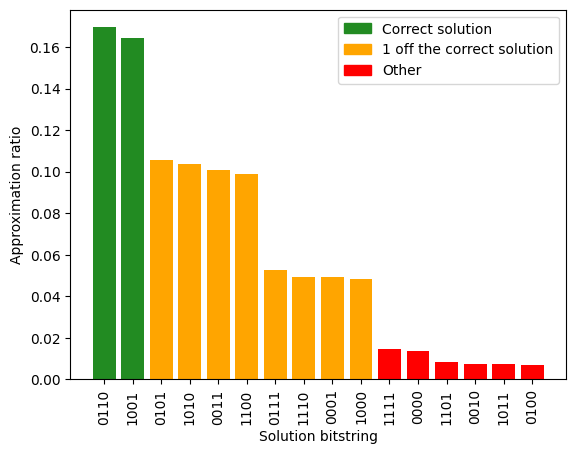

In [17]:
# Use initial parameters of 0
initial = np.zeros(2 * p)
# Run the optimizer with 20 iterations and 20 particles. The result is printed automatically
res = optimizer.Optimize(initial, 20, 20, 0.9, 0.4, 2.8, 1.3)
# Print the approximation ratio
print(f'Approximation ratio: {qaoa.ApproximationRatio(res, 8192):.2f}')
# Show the result
qaoa.Plot(res, 8192)
plt.show()